<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

## Matplotlib Exercise

For each plot, remember the best practises. Make sure your plot is:

- labelled (both axes and a title)
- big enough to be legible
- appropriately coloured
- scaled appropriately

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

**1.** Change the plotting style. Find a style you like here: [https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html](https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html)

In [2]:
plt.style.use("ggplot") 

**2.** Read in the `ufo` dataset from the `datasets` folder into a DataFrame

In [3]:
ufo = pd.read_csv("../datasets/ufo.csv")
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


**3.** Use an appropriate plot to visualise the number of times each shape was reported

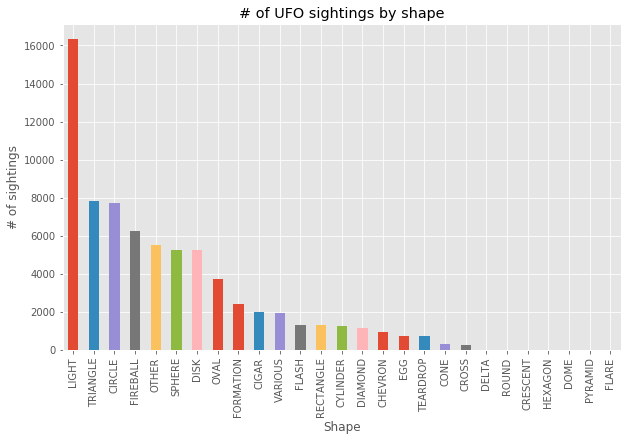

In [4]:
fig, ax = plt.subplots(figsize=(10, 6))

ufo["Shape Reported"].value_counts().plot(kind="bar", ax=ax)

ax.set_title("# of UFO sightings by shape")
ax.set_ylabel("# of sightings")
ax.set_xlabel("Shape")

plt.show()

**4.** Plot a horizontal bar chart to see how often each colour was reported.

Make sure the bars are in **descending** order

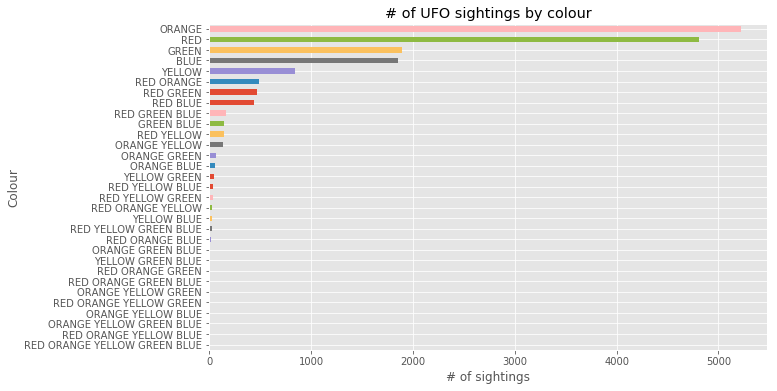

In [4]:
fig, ax = plt.subplots(figsize=(10, 6))

ufo["Colors Reported"].value_counts().sort_values(ascending=True).plot(kind="barh", ax=ax)

ax.set_title("# of UFO sightings by colour")
ax.set_xlabel("# of sightings")
ax.set_ylabel("Colour")

plt.show()

**5. Challenge:** With a plot, answer the following question: in the last 10 years of available data, how are sightings distributed by month?

When plotting months, you might have the data as numbers, not as month names.

Look in Python's `calendar` module to find something that can help you rename your labels: [https://docs.python.org/3/library/calendar.html](https://docs.python.org/3/library/calendar.html).

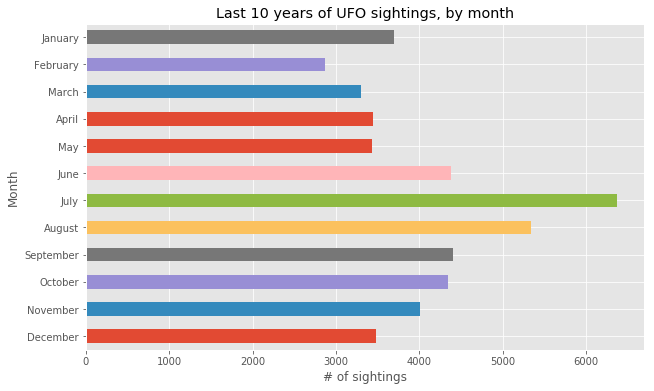

In [6]:
import calendar

# convert Time column to datetime
ufo["Time"] = pd.to_datetime(ufo["Time"],format="%m/%d/%Y %H:%M")

# extract both year and month
ufo["Year"] = ufo["Time"].dt.year
ufo["Month"] = ufo["Time"].dt.month

fig, ax = plt.subplots(figsize=(10, 6))

# filter year and aggregate by month
ufo.loc[ufo["Year"] > 2004, "Month"].value_counts().sort_index(ascending=False).plot("barh", ax=ax)

ax.set_title("Last 10 years of UFO sightings, by month")
ax.set_xlabel("# of sightings")
ax.set_ylabel("Month")

# calendar.month_name is a list of the month names
# where the first element is an empty string, so that indices match to months
# (i.e. January isn't month_names[0] but month_names[1])
# we also want them backwards
ax.set_yticklabels(list(reversed(calendar.month_name[1:])))

plt.show()

**6.** Plot "sightings per year" for the state of New York.

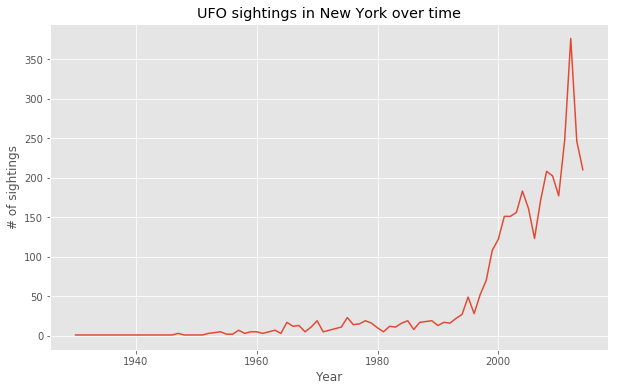

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))

ufo.loc[ufo["State"] == "NY", "Year"].value_counts().sort_index().plot(ax=ax)

ax.set_title("UFO sightings in New York over time")
ax.set_ylabel("# of sightings")
ax.set_xlabel("Year")

plt.show()

**7. Challenge:** On the same axis, plot the yearly sightings for at least two different states using different plotting styles for each (different colours and different markers).

Make sure you include a legend!

In [8]:
# note: this is only one way to do it!

# first, filter states and then count annual sightings per state
state_year_counts = ufo[ufo["State"].isin(["NY", "CA", "WA"])].groupby("State")["Year"].value_counts()

# this is what that looks like - there are two levels: State, and Year
state_year_counts

State  Year
CA     2012    742
       2013    709
       2008    701
       2009    643
       2011    617
       2003    594
       2010    593
       2014    585
       2007    580
       2004    559
       2006    559
       2005    538
       2000    434
       2002    422
       1999    404
       2001    372
       1998    228
       1995    197
       1997    146
       1996    128
       1994     65
       1978     52
       1993     42
       1977     40
       1990     40
       1979     36
       1992     35
       1976     34
       1980     34
       1981     34
              ... 
WA     1991      7
       1952      6
       1960      6
       1962      6
       1968      6
       1977      6
       1986      6
       1987      6
       1989      6
       1965      5
       1981      5
       1963      4
       1964      4
       1969      4
       1972      4
       1947      3
       1953      3
       1983      3
       1984      3
       1949      2
       1951      2


In [9]:
# to plot each item separately, one way is to make each column one of your groups
# we can use unstack() and T (short-hand for transposing the table) to get the data in the right format
state_year_counts.unstack()

Year,1930,1933,1935,1937,1941,1942,1944,1945,1946,1947,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
State,,,,,,,,,,,,,,,,,,,,,
CA,NaN,NaN,1.0,1.0,1.0,1.0,1.0,2.0,2.0,7.0,...,538.0,559.0,580.0,701.0,643.0,593.0,617.0,742.0,709.0,585.0
NY,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,...,161.0,123.0,171.0,208.0,202.0,177.0,248.0,376.0,246.0,210.0
WA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,...,191.0,177.0,216.0,199.0,231.0,271.0,300.0,417.0,320.0,246.0


In [10]:
# the final plottable dataset looks like this:
state_year_counts.unstack().T

State,CA,NY,WA
Year,,,
1930,NaN,1.0,NaN
1933,NaN,1.0,NaN
1935,1.0,NaN,NaN
1937,1.0,NaN,NaN
1941,1.0,NaN,NaN
1942,1.0,NaN,NaN
1944,1.0,NaN,NaN
1945,2.0,NaN,NaN
1946,2.0,1.0,1.0


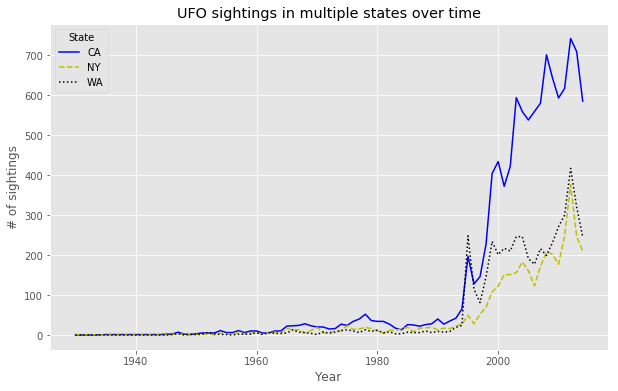

In [11]:
# fill blanks with zeros
state_year_counts_to_plot = state_year_counts.unstack().T.fillna(0)

fig, ax = plt.subplots(figsize=(10, 6))

state_year_counts_to_plot.plot(ax=ax, style={
    "CA": "-b",
    "NY": "--y",
    "WA": ":k"
})

ax.set_title("UFO sightings in multiple states over time")
ax.set_ylabel("# of sightings")
ax.set_xlabel("Year")

plt.show()